# Class 8: The Scale Space and Convolutional Layers

## Preliminaries

Run the cell below to download the course library.

In [ ]:
import gdown

gdown.download(id='1SzvuBYIZ407c9eOChXD48NG94v7azJby')

Downloading...
From (original): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby
From (redirected): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby&confirm=t&uuid=f756aeee-2a31-4048-9ee8-c3d9c1d59622
To: /content/sdx.py
100%|██████████| 2.83k/2.83k [00:00<00:00, 4.03MB/s]


'sdx.py'

Run the cell below to import the class modules.

If you get import warnings, try using **`Ctrl+M .`** to restart the kernel. *(notice there is a dot there)*

In [ ]:
from tensorflow import keras
from sdx import *

## Loading the training and testing data

We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) again, but probably for the last time.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Convenience functions

Since we will use the same training parameters for all networks, we will define some functions to avoid repetition.

In [ ]:
def compile_and_summary(model):
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    )
    model.summary()

In [ ]:
def fit_default_parameters(model):
    history = model.fit(
        train_images, train_labels,
        epochs=32,
        batch_size=32,
        validation_data=(test_images, test_labels),
    )
    return history

## Revisiting the single dense layer neural network

Back in Class 5, this network had the best overall results, since adding the `activation='relu'` parameter resulted in a smaller loss but also led to overfitting. So we will start with this network as benchmark.

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(397),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 397)               311645    
                                                                 
 dense_1 (Dense)             (None, 10)                3980      
                                                                 
Total params: 315625 (1.20 MB)
Trainable params: 315625 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/32
1875/1875 [==============================] - 13s 7ms/step - loss: 23.4919 - val_loss: 9.4460
Epoch 2/32
1875/1875 [==============================] - 12s 6ms/step - loss: 4.9195 - val_loss: 3.7331
Epoch 3/32
1875/1875 [==============================] - 13s 7ms/step - loss: 4.0895 - val_loss: 3.7741
Epoch 4/32
1875/1875 [==============================] - 13s 7ms/step - loss: 3.8541 - val_loss: 3.5539
Epoch 5/32
1875/1875 [==============================] - 12s 7ms/step - loss: 3.8175 - val_loss: 3.7647
Epoch 6/32
1875/1875 [==============================] - 12s 6ms/step - loss: 3.7817 - val_loss: 3.3322
Epoch 7/32
1875/1875 [==============================] - 12s 7ms/step - loss: 3.6920 - val_loss: 3.2120
Epoch 8/32
1875/1875 [==============================] - 12s 7ms/step - loss: 3.6903 - val_loss: 3.8573
Epoch 9/32
1875/1875 [==============================] - 13s 7ms/step - loss: 3.6568 - val_loss: 3.0855
Epoch 10/32
1875/1875 [==============================] - 13s 7ms/step - 

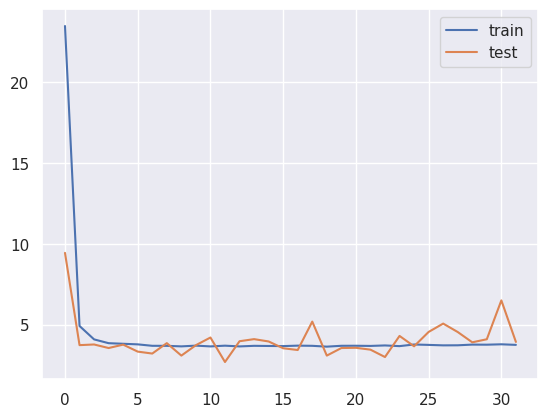

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

This is the smallest training loss we got, but we couldn't get rid of the oscillation in the testing loss.

## Replacing the dense layer with a convolutional layer

Instead of the dense layer, we will now use a convolutional layer with three $3 \times 3$ filters.

The idea is inspired by the scale space, which is based on convolving the image with multiple Gaussian kernels.

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(3, (3, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 flatten_1 (Flatten)         (None, 2028)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                20290     
                                                                 
Total params: 20320 (79.38 KB)
Trainable params: 20320 (79.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The size of the output tensor is $26 \times 26 \times 3$, since the borders are ignored and there are three filters.

The number of parameters in the convolutional layer is $30$: for each of the three filters, there are $3 \times 3$ weights and one bias.

Epoch 1/32
1875/1875 [==============================] - 15s 8ms/step - loss: 3.6942 - val_loss: 1.3106
Epoch 2/32
1875/1875 [==============================] - 14s 8ms/step - loss: 0.7728 - val_loss: 0.5241
Epoch 3/32
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4665 - val_loss: 0.3414
Epoch 4/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4143 - val_loss: 0.4872
Epoch 5/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4000 - val_loss: 0.3777
Epoch 6/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3927 - val_loss: 0.9272
Epoch 7/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3989 - val_loss: 0.3801
Epoch 8/32
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3924 - val_loss: 0.5005
Epoch 9/32
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3950 - val_loss: 0.4913
Epoch 10/32
1875/1875 [==============================] - 14s 7ms/step - l

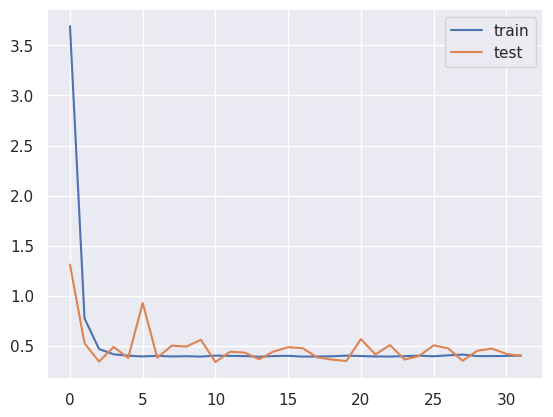

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

## Adding another convolutional layer

We will now add another convolutional layer that collapses the three channels. The idea is inspired by the scale space Laplacian.

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(3, (3, 3)),
    keras.layers.Conv2D(1, (1, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 3)         30        
                                                                 
 conv2d_33 (Conv2D)          (None, 26, 26, 1)         4         
                                                                 
 flatten_16 (Flatten)        (None, 676)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                6770      
                                                                 
Total params: 6804 (26.58 KB)
Trainable params: 6804 (26.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The size of the output tensor is $26 \times 26 \times 1$, since the borders are not ignored and there is one filter.

The number of parameters in the second convolutional layer is $4$: there are $1 \times 1$ weights for each channel, plus one bias.

Epoch 1/32
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3184 - val_loss: 0.3695
Epoch 2/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4660 - val_loss: 0.3458
Epoch 3/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4610 - val_loss: 0.3636
Epoch 4/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4591 - val_loss: 0.3338
Epoch 5/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4439 - val_loss: 0.3200
Epoch 6/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4539 - val_loss: 0.2933
Epoch 7/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4561 - val_loss: 0.4729
Epoch 8/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4554 - val_loss: 0.3653
Epoch 9/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4531 - val_loss: 0.4993
Epoch 10/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.458

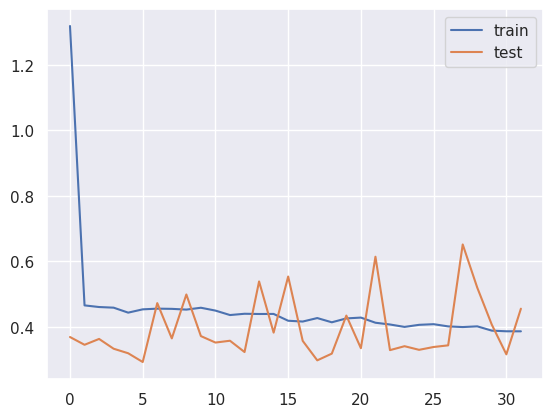

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

## Removing bias

To be more faithful to the idea of representing a scale space, we will add the `use_bias=False` to disable the bias.

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(3, (3, 3), use_bias=False),
    keras.layers.Conv2D(1, (1, 1), use_bias=False),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 3)         27        
                                                                 
 conv2d_35 (Conv2D)          (None, 26, 26, 1)         3         
                                                                 
 flatten_17 (Flatten)        (None, 676)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                6770      
                                                                 
Total params: 6800 (26.56 KB)
Trainable params: 6800 (26.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Notice the small difference in the number of parameters.

Epoch 1/32
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3111 - val_loss: 0.3273
Epoch 2/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3948 - val_loss: 0.3160
Epoch 3/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3922 - val_loss: 0.3716
Epoch 4/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3900 - val_loss: 0.3402
Epoch 5/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3980 - val_loss: 0.3155
Epoch 6/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3868 - val_loss: 0.3750
Epoch 7/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3913 - val_loss: 0.4553
Epoch 8/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3836 - val_loss: 0.3073
Epoch 9/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3829 - val_loss: 0.2979
Epoch 10/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.384

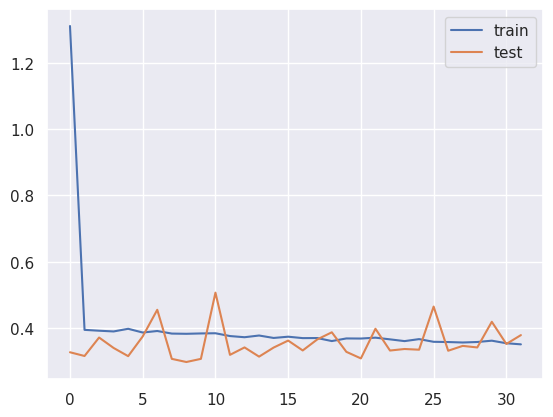

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

## Re-revisiting the activation parameter

Finally, we will add the `activation='relu'` parameter, which was what resulted in a smaller loss but also led to overfitting in Class 5.

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(3, (3, 3), use_bias=False, activation='relu'),
    keras.layers.Conv2D(1, (1, 1), use_bias=False, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

compile_and_summary(model)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 3)         27        
                                                                 
 conv2d_31 (Conv2D)          (None, 26, 26, 1)         3         
                                                                 
 flatten_15 (Flatten)        (None, 676)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                6770      
                                                                 
Total params: 6800 (26.56 KB)
Trainable params: 6800 (26.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Notice that there are no difference in the number of parameters.

Epoch 1/32
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9349 - val_loss: 0.2991
Epoch 2/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2914 - val_loss: 0.2806
Epoch 3/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2738 - val_loss: 0.2599
Epoch 4/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2640 - val_loss: 0.2508
Epoch 5/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2587 - val_loss: 0.2475
Epoch 6/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2539 - val_loss: 0.2538
Epoch 7/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2519 - val_loss: 0.2548
Epoch 8/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2491 - val_loss: 0.2458
Epoch 9/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2470 - val_loss: 0.2474
Epoch 10/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.246

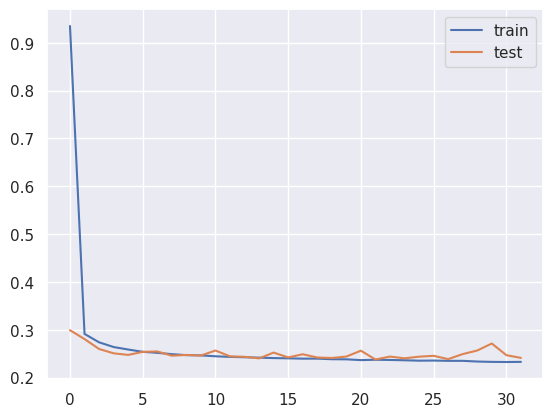

In [ ]:
history = fit_default_parameters(model)

plot_loss(history)

You can click on the toc.png tab to the left to browse by section.